In [180]:
import sys
import logging
import matplotlib.pyplot as plt
import cstrees.cstree as ct
import cstrees.scoring as sc
import cstrees.stage as st
import cstrees.learning as ctl
import networkx as nx
import numpy as np
%load_ext autoreload
%autoreload 2
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
from cstrees import csi_relation

ci = csi_relation.CI({1,2}, {3,4},{5})
print(ci)
dec = csi_relation.decomposition(ci)
for d in dec:
    print(d)

X1, X2 ⊥ X3, X4 | X5
X1 ⊥ X3 | X5
X1 ⊥ X4 | X5
X2 ⊥ X3 | X5
X2 ⊥ X4 | X5


In [182]:
wk = csi_relation.weak_union(ci)
for w in wk:
    print(w)

X1, X2 ⊥ X4 | X3, X5
X1, X2 ⊥ X3 | X4, X5
X2 ⊥ X3, X4 | X1, X5
X1 ⊥ X3, X4 | X2, X5


In [183]:
print("Original CI: ", ci)
pw = csi_relation.pairwise_cis(ci)
print("Pairwise CIs:")
for x in pw:
    print(x)

Original CI:  X1, X2 ⊥ X3, X4 | X5
Pairwise CIs:
X1 ⊥ X3 | X2, X4, X5
X1 ⊥ X4 | X2, X3, X5
X2 ⊥ X3 | X1, X4, X5
X2 ⊥ X4 | X1, X3, X5


In [184]:
c = csi_relation.Context({6:0})
csi = csi_relation.CSI(ci, c)

print("Original CSI: ", csi)
pw = csi_relation.pairwise_csis(csi)
print("Pairwise CSIs:")
for x in pw:
    print(x)

Original CSI:  X1, X2 ⊥ X3, X4 | X5, X6=0
Pairwise CSIs:
X1 ⊥ X3 | X2, X4, X5, X6=0
X1 ⊥ X4 | X2, X3, X5, X6=0
X2 ⊥ X3 | X1, X4, X5, X6=0
X2 ⊥ X4 | X1, X3, X5, X6=0


      a  b  c
0     2  2  2
1     1  0  1
2     1  0  0
3     1  0  0
4     0  0  0
...  .. .. ..
4996  1  0  0
4997  1  0  0
4998  0  0  0
4999  1  0  0
5000  1  0  0

[5001 rows x 3 columns]


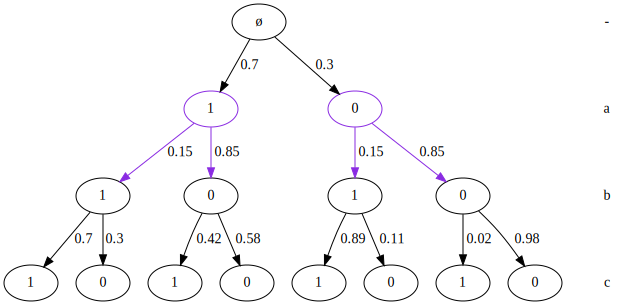

In [185]:
np.random.seed(6)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

# V-structure
tree.update_stages({
    0: [st.Stage([{0, 1}])],
    1: [st.Stage([0, 0]), st.Stage([0, 1]), st.Stage([1, 0]), st.Stage([1, 1])]})

tree.sample_stage_parameters(alpha=1.0)

a = tree.plot()

# a.draw("testplot.png")
x = tree.sample(5000)
print(x)

true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
a


In [353]:

order = ["a", "b", "c"]
# Should order be expressed as the labels or as the levels?
# labels seems more natural but may include strings then which is a bit ugly.

# This is the order of the data columns.
s1 = sc.score_order(order, x, max_cvars=2, alpha_tot=1.0, method="BDeu", strategy="posterior")
print(s1)


stagings level: -1
log_level_prior: -1.0986122886681098
log_staging_prior: -0.0
log_marg_lik: -3115.0216383111074
score at level 0 : -3116.1202505997753
stagings level: 0
log_level_prior: -0.6931471805599453
log_staging_prior: -0.0
log_marg_lik: -2123.2266608674863
score at level 1 : -2123.9198080480464
stagings level: 1
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_marg_lik: -3292.2714536953135
stagings level: 1
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_marg_lik: -3032.6122823943247
score at level 2 : -3033.305429574885
-8273.345488222707


In [352]:
#order = [0, 2, 1]
order = ["a", "c", "b"]  # We know that b should not be to the very right.
s2 = sc.score_order(order, x, max_cvars=2, alpha_tot=1.0, method="BDeu", strategy="posterior")
print(s2)


stagings level: -1
log_level_prior: -1.0986122886681098
log_staging_prior: -0.0
log_marg_lik: -3115.0216383111074
score at level 0 : -3116.1202505997753
stagings level: 0
log_level_prior: -0.6931471805599453
log_staging_prior: -0.0
log_marg_lik: -3292.2714536953135
score at level 1 : -3292.9646008758737
stagings level: 1
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_marg_lik: -2123.2266608674863
stagings level: 1
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_marg_lik: -2127.563815165124
score at level 2 : -2123.9068190918438
-8532.991670567493


optimal order: ['a', 'b', 'c'], score -7767.510194306091
stages :{0: [<cstrees.stage.Stage object at 0x7febc104a590>], 1: [<cstrees.stage.Stage object at 0x7fec089696f0>, <cstrees.stage.Stage object at 0x7febbadd0550>, <cstrees.stage.Stage object at 0x7febbadd0940>, <cstrees.stage.Stage object at 0x7febbadd0910>], 2: [], -1: [<cstrees.stage.Stage object at 0x7febc8bf23b0>]}

Optimal CStree stagings per level:
level 0:
[{0, 1}]
level 1:
[0, 0]
[1, 0]
[0, 1]
[1, 1]
level 2:


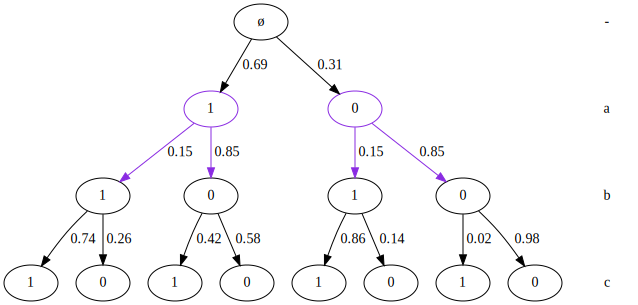

In [188]:
optord, score = ctl._find_optimal_order(
    x, strategy="posterior", max_cvars=2, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ctl._optimal_cstree_given_order(optord, x, max_cvars=2,
                             alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))

print("\nOptimal CStree stagings per level:")
for key, val in opttree.stages.items():
    if key == -1:
        continue
    print("level {}:".format(key))
    for val2 in val:
        print(val2)
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.plot()


In [189]:
opt_cdags = opttree.to_minimal_context_graphs()
for key, val in opt_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_opt.png",
                args='-Glabel="'+str(key)+'"   ')


In [190]:
tree = ctl.find_optimal_cstree(x, max_cvars=2, alpha_tot=1.0, method="BDeu")

tree.to_df()


,a,b,c
0,2,2,2
1,*,-,-
2,0,0,-
3,1,0,-
4,0,1,-
5,1,1,-


In [191]:
list(range(10,1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]

In [264]:
order = ["a", "b", "c"]
orderscore = sc.score_order(order, x, strategy="posterior", max_cvars=2, alpha_tot=1.0, method="BDeu")
nodescores = [sc._score_order_at_level(order, level, x, strategy="posterior", max_cvars=2, alpha_tot=1.0, method="BDeu") for level in range(len(order))]
print(orderscore)
print(nodescores)
print(np.sum(nodescores))
neig = ctl.get_relocation_neighborhood(order, 1, orderscore, nodescores, x, max_cvars=2, alpha_tot=1.0, method="BDeu")
print(order)
print("nodescores: ", nodescores)

print("neig: ", list(neig))


var: a
[] {1: 3431, 0: 1569}
score at level 0 : -3115.0216383111074
var: b
[{0, 1}] {0: 4247, 1: 753}


[1] {0: 2910, 1: 521}
[0] {0: 1337, 1: 232}
score at level 1 : -2123.2136719112837
var: c
[{0, 1}] {1: 1837, 0: 3163}
[1, {0, 1}] {1: 1608, 0: 1823}
[0, {0, 1}] {0: 1340, 1: 229}
[{0, 1}, 0] {1: 1252, 0: 2995}
[{0, 1}, 1] {1: 585, 0: 168}
[1, {0, 1}] {1: 1608, 0: 1823}
[0, 0] {0: 1308, 1: 29}
[0, 1] {1: 200, 0: 32}
[1, 0] {1: 1223, 0: 1687}
[0, {0, 1}] {0: 1340, 1: 229}
[1, 1] {0: 136, 1: 385}
[1, 0] {1: 1223, 0: 1687}
[0, 0] {0: 1308, 1: 29}
[{0, 1}, 1] {1: 585, 0: 168}
[{0, 1}, 0] {1: 1252, 0: 2995}
[0, 1] {1: 200, 0: 32}
[1, 1] {0: 136, 1: 385}
[1, 0] {1: 1223, 0: 1687}
[0, 0] {0: 1308, 1: 29}
[0, 1] {1: 200, 0: 32}
[1, 1] {0: 136, 1: 385}
score at level 2 : -2529.227777909127
var: a
[] {1: 3431, 0: 1569}
var: b
[{0, 1}] {0: 4247, 1: 753}
[1] {0: 2910, 1: 521}
[0] {0: 1337, 1: 232}
var: c
[{0, 1}] {1: 1837, 0: 3163}
[1, {0, 1}] {1: 1608, 0: 1823}
[0, {0, 1}] {0: 1340, 1: 229}
[{0, 1}, 0] {1: 1252, 0: 2995}
[{0, 1}, 1] {1: 585, 0: 168}
[1, {0, 1}] {1: 1608, 0: 1823}
[0, 0] {0: 1308, 

In [ ]:
orders, scores = ctl.gibbs_order_sampler(100, x, max_cvars=2, alpha_tot=1.0, method="BDeu")


In [ ]:
scores

In [ ]:
orders

In [ ]:
x

,a,b,c
0,2,2,2
1,1,0,1
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
4996,1,0,0
4997,1,0,0
4998,0,0,0
4999,1,0,0


In [347]:
import pp
scores = sc.score_tables(x)
pp(scores)

{
    'a': {
        'None': -3115.0216383111074,
        'b=0': -2650.31614489616,
        'b=0,c=0': -2057.2395269941417,
        'b=0,c=1': -141.82873783944257,
        'b=1': -469.0426477125852,
        'b=1,c=0': -85.49295540343263,
        'b=1,c=1': -380.1888463326886,
        'c=0': -2160.163959341704,
        'c=1': -695.1985076684147,
    },
    'b': {
        'None': -2123.2266608674863,
        'a=0': -661.6374833205173,
        'a=0,c=0': -155.14647749767693,
        'a=0,c=1': -90.72916825778265,
        'a=1': -1465.926331844607,
        'a=1,c=0': -488.3787172705481,
        'a=1,c=1': -889.9590648722904,
        'c=0': -660.9566717123547,
        'c=1': -1153.8691566263565,
    },
    'c': {
        'None': -3292.2714536953135,
        'a=0': -656.3576078337379,
        'a=0,b=0': -143.7640875067146,
        'a=0,b=1': -96.83168276196562,
        'a=1': -2376.254674560587,
        'a=1,b=0': -1985.1977559287652,
        'a=1,b=1': -303.4683689300532,
        'b=0': -25

In [348]:
oscores = sc.order_score_tables(x)

staging level: -1
log_level_prior: -1.0986122886681098
log_staging_prior: -0.0
log_likelihood: -3115.0216383111074
staging level: 0
log_level_prior: -0.6931471805599453
log_staging_prior: -0.0
log_likelihood: -3115.0216383111074
staging level: 0
log_level_prior: -0.6931471805599453
log_staging_prior: -0.0
log_likelihood: -3115.0216383111074
staging level: 1
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_likelihood: -3115.0216383111074
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_likelihood: -3115.6889741312207
staging level: -1
log_level_prior: -1.0986122886681098
log_staging_prior: -0.0
log_likelihood: -2123.2266608674863
staging level: 0
log_level_prior: -0.6931471805599453
log_staging_prior: -0.0
log_likelihood: -2123.2266608674863
staging level: 0
log_level_prior: -0.6931471805599453
log_staging_prior: -0.0
log_likelihood: -2123.2266608674863
staging level: 1
log_level_prior: -0.0
log_staging_prior: -0.6931471805599453
log_likelihood: -2123.226

In [349]:
oscores

{'a': {'None': -3116.1202505997753,
  'b': -3115.7147854916675,
  'c': -3115.7147854916675,
  'b,c': -3116.382121311781},
 'b': {'None': -2124.3252731561543,
  'a': -2123.9198080480464,
  'c': -2123.9198080480464,
  'a,c': -2124.5871438681597},
 'c': {'None': -3293.3700659839815,
  'a': -3292.9646008758737,
  'b': -3292.9646008758737,
  'a,b': -3033.305429574885}}

In [350]:
sc.score_order_tables(["a", "b", "c"], oscores)

score: -3116.1202505997753
score: -2123.9198080480464
score: -3033.305429574885


-8273.345488222707

In [351]:
sc.score_order_tables(["a", "c", "b"], oscores)

score: -3116.1202505997753
score: -3292.9646008758737
score: -2124.5871438681597


-8533.671995343808